In [3]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
(x_train,y_train),(x_test,y_test) = data
print(x_train.shape)
labels =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]   #From Documentation

(60000, 28, 28)


Ankle boot


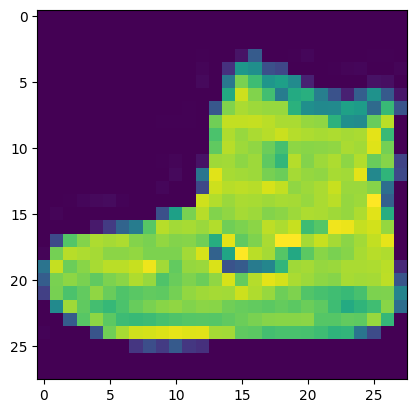

In [6]:
plt.imshow(x_train[0])
print(labels[y_train[0]])

<AxesSubplot:ylabel='count'>

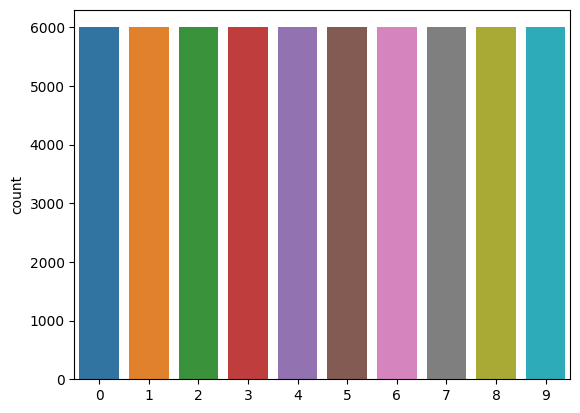

In [7]:
sns.countplot(x=y_train)

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu', input_shape=(28, 28, 1),),
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu',),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu',),
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu',),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32,(5,5), padding='same', activation='relu',),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        25632     
                                                      

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=10,
                    validation_split=0.1,)

Epoch 1/10
54000/54000 [==============================] - 525s 10ms/step - loss: 0.6817 - acc: 0.7520 - val_loss: 0.5346 - val_acc: 0.7823
Epoch 2/10
54000/54000 [==============================] - 463s 9ms/step - loss: 0.6148 - acc: 0.7870 - val_loss: 0.5227 - val_acc: 0.8227
Epoch 3/10
54000/54000 [==============================] - 463s 9ms/step - loss: 0.6568 - acc: 0.7737 - val_loss: 0.4721 - val_acc: 0.8258
Epoch 4/10
54000/54000 [==============================] - 473s 9ms/step - loss: 0.6742 - acc: 0.7733 - val_loss: 0.5464 - val_acc: 0.8135
Epoch 5/10
54000/54000 [==============================] - 461s 9ms/step - loss: 0.6821 - acc: 0.7698 - val_loss: 0.5002 - val_acc: 0.8233
Epoch 6/10
54000/54000 [==============================] - 466s 9ms/step - loss: 0.6866 - acc: 0.7658 - val_loss: 0.5037 - val_acc: 0.8133
Epoch 7/10
54000/54000 [==============================] - 469s 9ms/step - loss: 0.6903 - acc: 0.7664 - val_loss: 0.5687 - val_acc: 0.7975
Epoch 8/10
54000/54000 [=========

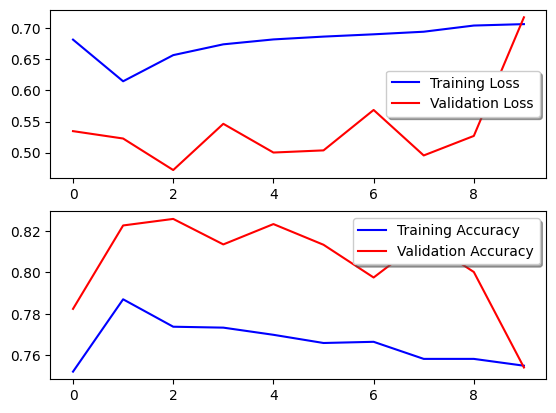

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
Y_pred = model.predict(x_test) 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 1s 3ms/step


<AxesSubplot:>

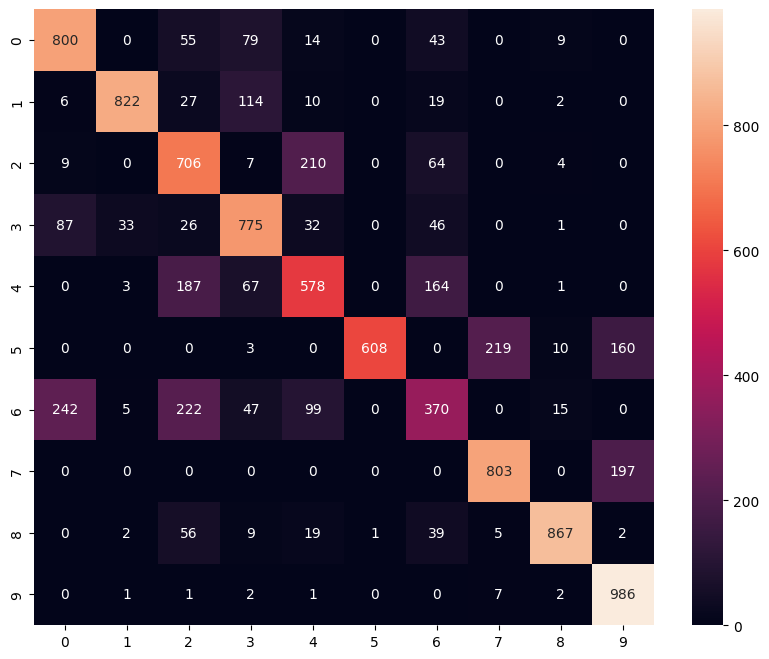

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')